<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

In [3]:
boston_df=pd.read_csv(boston_url)

# **Task 1: Become familiar with the dataset**

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [4]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [6]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# **Task 2: Generate Descriptive Statistics and Visualizations**

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

## For the "Median value of owner-occupied homes" provide a boxplot

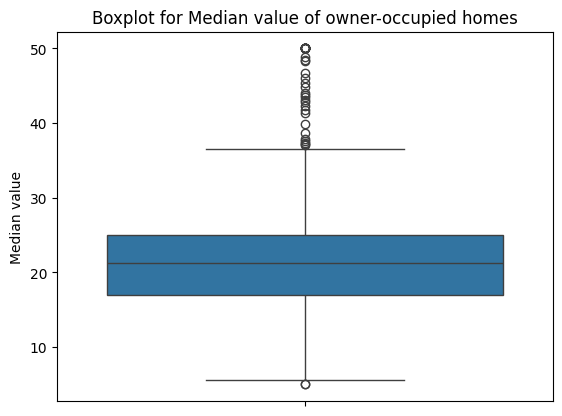

In [7]:
ax = sns.boxplot(y='MEDV', data=boston_df)
ax.set_title("Boxplot for Median value of owner-occupied homes")
ax.set_ylabel("Median value")
plt.show()

**Findings:**

* The **median** value of homes is around **\$21,000 - \$22,000**.

* **50%** of the house values lies roughly between **\$17,000 to \$25,000**.

* The **lower whisker** is around **\$5,000** and the **upper whisker** is around **\$37,000**.

* There are several **high-value outliers** above upper whisker with many clustering near the maximum of **\$50,000**. Also there is a **low-value outlier** around **\$5,000**.

* The **distribution** of house prices is slightly **skewed to the right** (positively skewed), because there are more high-value outliers than low-value outliers.

**Conclusion:**

The majority of owner-occupied homes are moderately priced, with a **median around \$21,000**. Most homes fall between **\$17,000 and \$25,000**, though there are significant number of high-value outiers above \$40,000,suggesting the presence of **premium housing** in certain areas.

## Provide a  bar plot for the Charles river variable

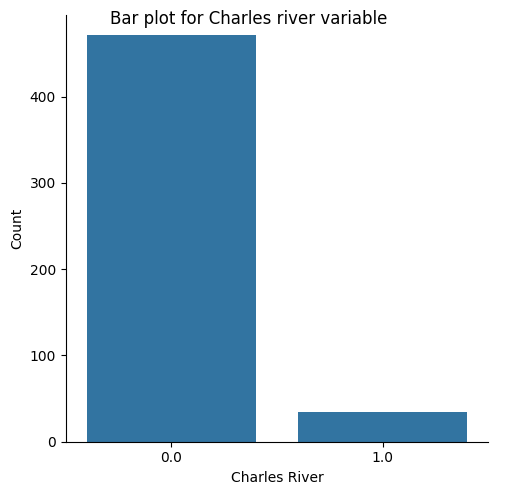

In [8]:
ax = sns.catplot(x='CHAS', kind='count', data=boston_df)
ax.fig.suptitle("Bar plot for Charles river variable")
ax.set_axis_labels("Charles River", "Count")
plt.show()

**Conclusion:**

* Almost all houses **(around 480) are far** from Charles river and very less houses **(around 20 - 25) are near** Charles river.

## Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [9]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_GROUP'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 years and older'

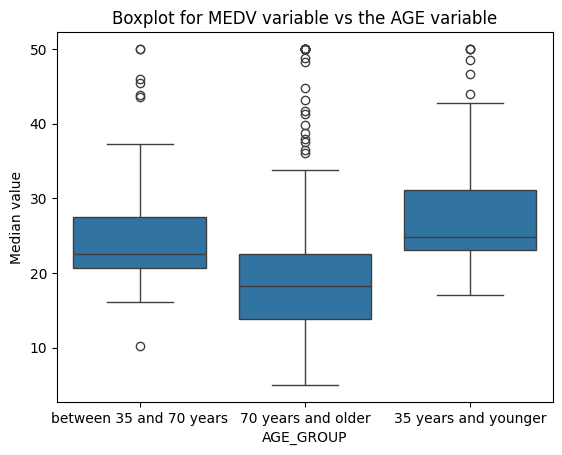

In [10]:
ax = sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
ax.set_title("Boxplot for MEDV variable vs the AGE variable")
ax.set_ylabel("Median value")
plt.show()

**Observations:**

* **For 35 years and younger:** Median value is around \$24,000 and 50% of the house prices lies roughly between \$23,000 and \$31,000. Low whisker is around \$17,000 and upper whisker is around \$43,000. There are some high-value outliers above \$40,000 with many clustering near the maximum of $50,000.

* **For between 35 and 70 years:** Median value is around \$23,000 and 50% of the house prices lies roughly between \$21,000 and \$27,000. Low whisker is around \$17,000 and upper whisker is around \$43,000. There are several high-value outliers above \$40,000 with many clustering near the maximum of \$50,000. Also there is a low-value outlier around $10,000.

* **For 70 years and older:** Median value is around \$18,000 and 50% of the house prices lies roughly between \$14,000 and \$23,000. low whisker is around \$3,000 and upper whisker is around \$34,000. There are several high-value outliers above \$40,000 with many clustering near the maximum of $50,000.

**Conclusion:**

All 3 age groups have different median value and spread. **Younger and middle** aged houses have **high prices** whereas **old houses** have relatively **low prices**. Although all aged groups have some outliers indicatings premium housing, but the old age houses has so many outliers indicating that that **most of the premium housing belongs to old age houses.**

## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

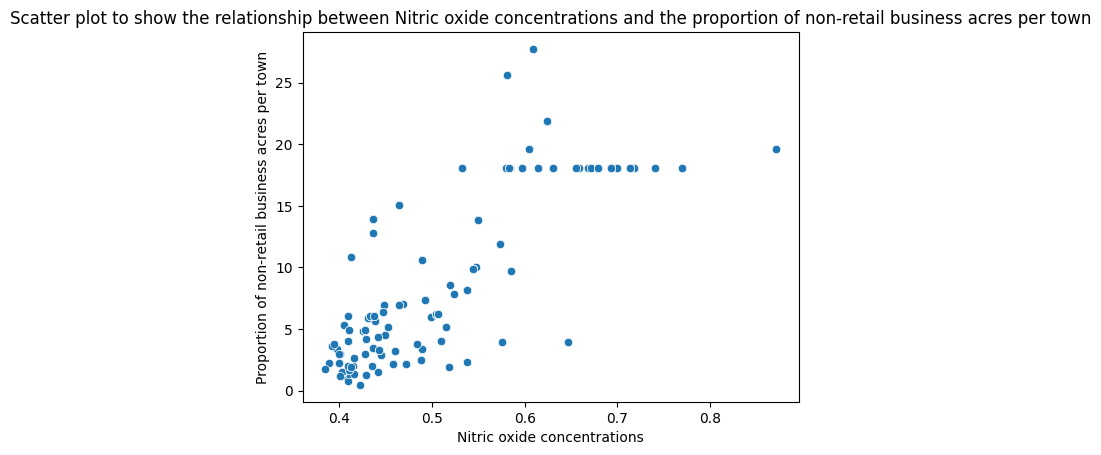

In [11]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
ax.set_title("Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town")
ax.set_xlabel("Nitric oxide concentrations")
ax.set_ylabel("Proportion of non-retail business acres per town")
plt.show()

**Observations:**

* Overall a positive relationship.

* The relationship is moderate. Not a perfect line.

* There are some clusters (NOX around 0.4-0.5 and INDUS around 0-5 ) and around INDUS = 18

* Also there are some outliers around INDUS 20-25

**Conclusion:**

With the increase of Nitric oxide concentrations the proportion of non-retail business acres per town also increases having some clusters and outliers, not making a pefect line, indicating the **moderate positive relationship**.

## Create a histogram for the pupil to teacher ratio variable

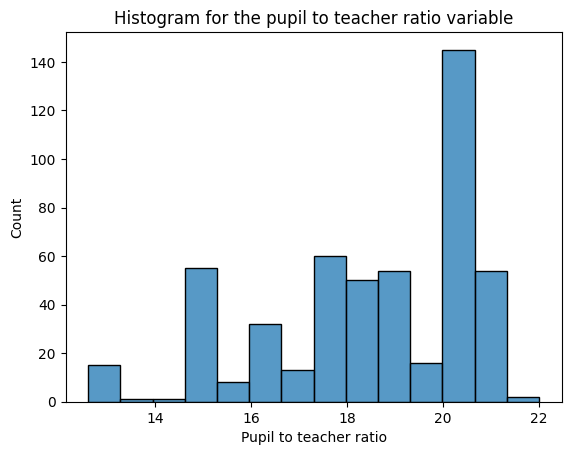

In [12]:
ax = sns.histplot(boston_df['PTRATIO'])
ax.set_title("Histogram for the pupil to teacher ratio variable")
ax.set_xlabel("Pupil to teacher ratio")
ax.set_ylabel("Count")
plt.show()

**Observations:**

* Ratio is ranges from 13 to 22.

* A few schools have much lower ratios (around 13-15) or higher raios (above 21)

* Most of the schools have ratios between 18-20 with a peak at around 20.

**Conclusion:**

The plot suggest that most of the schools have pupil-to-teacher ratio in the dataset is **around 20 students per teacher**. Very low ratios (close to 13) and very high ratios (above 21) are rare, which indicates that most schools maintain a similar ratio around the central peak.

# **Task 3: Use the appropriate tests to answer the questions provided.**

For each of the following questions;

Be sure to:

1. State your hypothesis.

2. Use α = 0.05

3. Perform the test Statistics.

4. State the conclusion from the test.

## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

**Null hypothesis**: There is no difference in median value of houses bounded by the Charles river.

**Alternative hypothesis**: There is a significant difference in median value of houses bounded by the Charles river.


/tmp/ipython-input-1463116979.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(boston_df['MEDV'],


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

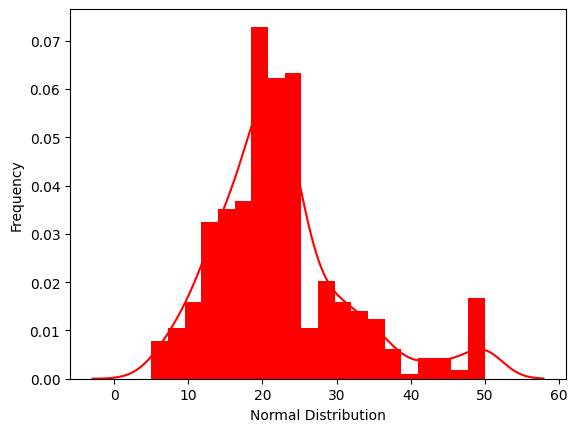

In [13]:
ax = sns.distplot(boston_df['MEDV'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

In [14]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=np.float64(8.75190489604598), pvalue=np.float64(0.003238119367639829))

As p_value < 0.05, so we can assume inequality of variance.

In [15]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                      boston_df[boston_df['CHAS'] == 1]['MEDV'],
                      equal_var=False)

TtestResult(statistic=np.float64(-3.113291312794837), pvalue=np.float64(0.0035671700981375174), df=np.float64(36.876408797611994))

**Conclusion:** As p_value < 0.05, we reject the null hypothesis as there is enough evidence that there is a significant difference in median value of houses bounded by the Charles river.

## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

**Null hypothesis**: There is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).

**Alternative hypothesis**: There is a significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).

In [16]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_GROUP'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 years and older'

In [17]:
scipy.stats.levene(boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV'], center='mean')

LeveneResult(statistic=np.float64(2.7806200293748304), pvalue=np.float64(0.06295337343259205))

As p_value < 0.05, so we can assume equality of variance.

In [18]:
thirtyfive_lower = boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']

In [19]:
f_statistics, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print(f"F_statistics: {f_statistics}, p_value: {p_value}")

F_statistics: 36.40764999196598, p_value: 1.7105011022702984e-15


**Conclusion:**

As p_value < 0.05, we reject the null hypothesis as there is enough evidence that there is a significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).

## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

**Null hypothesis**: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

**Alternative hypothesis**: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

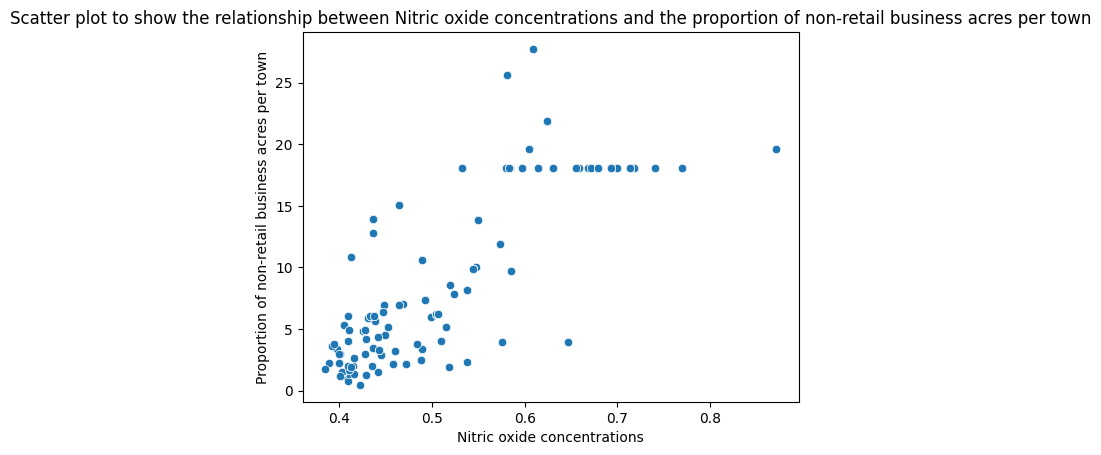

In [20]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
ax.set_title("Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town")
ax.set_xlabel("Nitric oxide concentrations")
ax.set_ylabel("Proportion of non-retail business acres per town")
plt.show()

In [21]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=np.float64(0.7636514469209154), pvalue=np.float64(7.913361061239639e-98))

**Conclusion:**

As p_value < 0.05, we reject the null hypothesis as there is enough evidence that there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

## What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

**Null hypothesis**: There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

**Alternative hypothesis**: There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

In [22]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 20 Aug 2025   Prob (F-statistic):           1.21e-08
Time:                        23:15:35   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:**

As p_value < 0.05, we reject the null hypothesis as there is enough evidence that there is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.